In [1]:
print("HEllo")


HEllo


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# import torch



# from raft.core.raft import RAFT
# from raft.core.utils import flow_viz
# from raft.core.utils.utils import InputPadder
# from raft.config import RAFTConfig

In [ ]:
import os
import sys
sys.path.append('/kaggle/input/raft-pytorch')

In [ ]:
# dont run
import raft

from glob import glob
from PIL import Image
from tqdm import tqdm

from scipy import signal

In [21]:
# Check if the file path exists for the initial video
import os
# home
# print("file exists?", os.path.exists("/Users/misheton/Library/CloudStorage/OneDrive-UniversityofSussex/FYP/Participants/Participant_12/Processed_data/Video/Subject_12_01.mp4"))
# uni
print("file exists?", os.path.exists("C:/Users/men22/OneDrive - University of Sussex/FYP/Participants/Participant_12/Processed_data/Video/Subject_12_01.mp4"))


file exists? True


In [31]:
# Check if the video can be read using opencv
# home
# video = cv2.VideoCapture('/Users/misheton/Library/CloudStorage/OneDrive-UniversityofSussex/FYP/Participants/Participant_12/Processed_data/Video/Subject_12_01.mp4')
# uni
video = cv2.VideoCapture("C:/Users/men22/OneDrive - University of Sussex/FYP/Participants/Participant_12/Processed_data/Video/Subject_12_01.mp4")
type(video)
# /Users/misheton/Library/CloudStorage/OneDrive-UniversityofSussex/FYP/Participants/Participant_12/Processed_data/Video/Subject_12_01.mp4

cv2.VideoCapture

In [ ]:
video.open(0)
# Check if camera opened successfully
if (video.isOpened()== False):
	print("Error opening video file")

# Read until video is completed
while(video.isOpened()):
	
# Capture frame-by-frame
	ret, frame = video.read()
	# Display the resulting frame
	cv2.imshow('Frame', frame)
		
	# Press Q on keyboard to exit
	if cv2.waitKey(25) & 0xFF == ord('q'):
			break

# Break the loop
	else:
		break

# When everything done, release
# the video capture object
video.release()

# Closes all the frames
cv2.destroyAllWindows()


In [ ]:
if (video.isOpened()== False):
	print("Error opening video file")

# Read until video is completed
while(video.isOpened()):
	
# Capture frame-by-frame
	ret, frame = video.read()
	# Display the resulting frame
	cv2.imshow('Frame', frame)
		
	# Press Q on keyboard to exit
	if cv2.waitKey(25) & 0xFF == ord('q'):
			break

# Break the loop
	else:
		break

# When everything done, release
# the video capture object
video.release()

# Closes all the frames
cv2.destroyAllWindows()


Get all the frames in frames

In [33]:
frames = []
#frames = np.array(frames)
path = 'C:/Users/men22/OneDrive - University of Sussex/FYP/Participants/Participant_12/Processed_data/Video/Subject_12_01.mp4'
cap = cv2.VideoCapture(path)
ret = True
while ret:
    # ret, frame = cap.read()
    # (height, width) = frame.shape[:2]
    # sky = frame[150:500, 600:900]
    # cv2.imshow('Video', sky)
  ret, img = cap.read() # read one frame from the 'capture' object; img is (H, W, C)
  if ret:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    frames.append(gray)
video = np.stack(frames, axis=0) # dimensions (T, H, W, C)

In [34]:
# Cut the video to only show the mouth properties - cut around the mouth
video = video[:, 150:500, 600:900]
video.shape

(1953, 350, 300)

1 in 6 frames - done
simple 
cut video around the mouth - done
properties - how well can predict
and how smooth it is


calculate the gradient of the optical flow in x and y
first derivative - how quickly is the flow field changing in direction x

In [ ]:
# Display the resulting frames - 1 in 6 frames as there isn't movement for every frame
for i in range(0,200,1):
  print(i)
  plt.imshow(video[i], cmap='gray')
  plt.show()

In [ ]:
# RAFT but not working
def inference(args):
    # get the RAFT model
    model = RAFT(args)
    # load pretrained weights
    pretrained_weights = torch.load(args.model)

config = RAFTConfig(
    dropout=0,
    alternate_corr=False,
    small=False,
    mixed_precision=False
)

model = RAFT(config)
model

In [ ]:
# using signal but not working

import signal

def optical_flow(I1g, I2g, window_size, tau=1e-2):
 
    kernel_x = np.array([[-1., 1.], [-1., 1.]])
    kernel_y = np.array([[-1., -1.], [1., 1.]])
    kernel_t = np.array([[1., 1.], [1., 1.]])#*.25
    w = window_size/2 # window_size is odd, all the pixels with offset in between [-w, w] are inside the window
    I1g = I1g / 255. # normalize pixels
    I2g = I2g / 255. # normalize pixels
    # Implement Lucas Kanade
    # for each point, calculate I_x, I_y, I_t
    mode = 'same'
    fx = signal.convolve2d(I1g, kernel_x, boundary='symm', mode=mode)
    fy = signal.convolve2d(I1g, kernel_y, boundary='symm', mode=mode)
    ft = signal.convolve2d(I2g, kernel_t, boundary='symm', mode=mode) + signal.convolve2d(I1g, -kernel_t, boundary='symm', mode=mode)
    u = np.zeros(I1g.shape)
    v = np.zeros(I1g.shape)
    # within window window_size * window_size
    for i in range(w, I1g.shape[0]-w):
        for j in range(w, I1g.shape[1]-w):
            Ix = fx[i-w:i+w+1, j-w:j+w+1].flatten()
            Iy = fy[i-w:i+w+1, j-w:j+w+1].flatten()
            It = ft[i-w:i+w+1, j-w:j+w+1].flatten()
            #b = ... # get b here
            #A = ... # get A here
            # if threshold τ is larger than the smallest eigenvalue of A'A:
            nu = ... # get velocity here
            u[i,j]=nu[0]
            v[i,j]=nu[1]
 
    return (u,v)

In [ ]:
import torchvision.transforms.functional as F

plt.rcParams["savefig.bbox"] = "tight"
# sphinx_gallery_thumbnail_number = 2


def plot(imgs, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        # Make a 2d grid even if there's just 1 row
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0])
    _, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    for row_idx, row in enumerate(imgs):
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            img = F.to_pil_image(img.to("cpu"))
            ax.imshow(np.asarray(img), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    plt.tight_layout()

In [ ]:
import tensorflow as tf
video1 = tf.reshape(video, [1888, 3, 720, 1280])

In [ ]:
import tempfile
from pathlib import Path
from urllib.request import urlretrieve
from torchvision.io import read_video

video_path = "drive/MyDrive/FYP/Subject_10_01.mp4"
# frames, _, _ = read_video(str('drive/MyDrive/FYP/Subject_10_01.mp4'), output_format="TCHW")

img1_batch = torch.stack([torch.from_numpy(video[100]), torch.from_numpy(video[150])])
img1_batch.shape
img2_batch = torch.stack([torch.from_numpy(video1[101]), torch.from_numpy(video1[151])])

plot(img1_batch)

CV Lab Tracking - Lucas-Kanade
- works best in slow motion




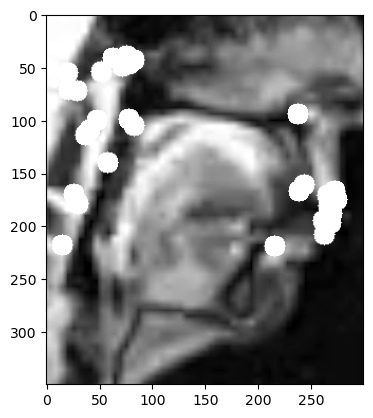

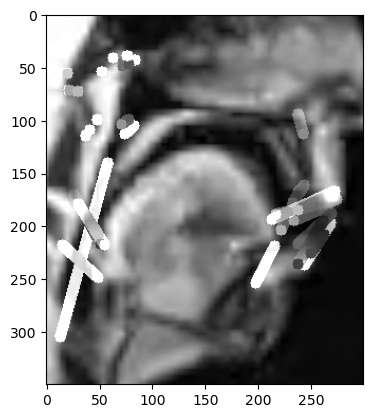

(<matplotlib.image.AxesImage at 0x266ee767dc0>, None)

In [ ]:
feature_params = dict(maxCorners = 30, qualityLevel = 0.2, minDistance = 6, blockSize = 7)
p0 = cv2.goodFeaturesToTrack(video[0,...],mask = None, **feature_params)
color = np.random.randint(0,255,(100,3))
frame_start = 63
frame0 = np.copy(video[frame_start,...])
frame_end = 64
for i in p0:
    x,y = i.ravel()
    cv2.circle(frame0,(int(x),int(y)),10,(255,0,255),-1)
plt.imshow(frame0, cmap='gray'),plt.show()

lk_params = dict( winSize  = (30,30),
                  maxLevel = 5,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))
mask = np.zeros_like(frame0)
frame = np.copy(video[frame_end,...])
p1, st, err = cv2.calcOpticalFlowPyrLK(video[0,...], video[frame_end,...], p0, None, **lk_params)
good_new = p1[st==1]
good_old = p0[st==1]
# draw the tracks
for i,(new,old) in enumerate(zip(good_new, good_old)):
    a,b = new.ravel()
    c,d = old.ravel()
    mask = cv2.line(mask, (int(a),int(b)),(int(c),int(d)), color[i].tolist(), 10)
    frame = cv2.circle(frame,(int(a),int(b)),5,color[i].tolist(),-1)
img = cv2.add(frame,mask)

plt.imshow(img, cmap='gray'), plt.show()

# plt.imshow(video[frame_start,...], cmap='gray'), plt.show()
# plt.imshow(video[frame_end,...], cmap='gray'), plt.show()


In [ ]:
plt.plot(err)

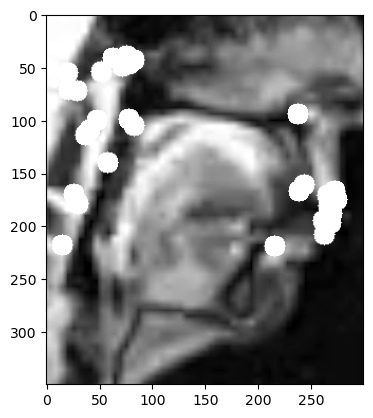

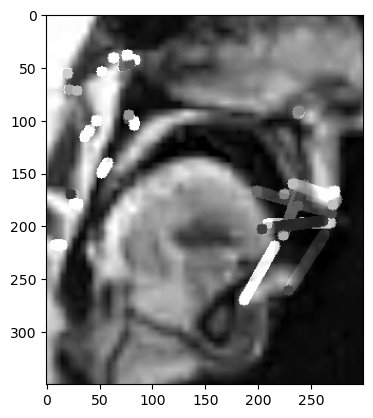

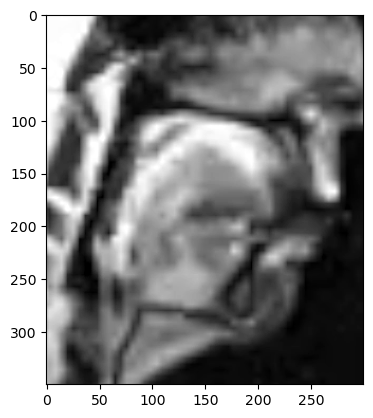

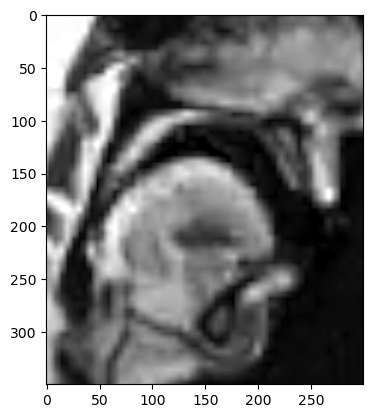

(<matplotlib.image.AxesImage at 0x266624f99a0>, None)

In [ ]:
# p0 = cv2.goodFeaturesToTrack(video[39,...],1000, 0.15, 30)
# color = np.random.randint(0,255,(100,3))
frame_start = 63
frame0 = np.copy(video[frame_start,...])
frame_end = 80
for i in p0:
    x,y = i.ravel()
    cv2.circle(frame0,(int(x),int(y)),10,(255,0,255),-1)
plt.imshow(frame0, cmap='gray'),plt.show()

lk_params = dict( winSize  = (30,30),
                  maxLevel = 5,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))
mask = np.zeros_like(frame0)
frame = np.copy(video[frame_end,...])
p1, st, err = cv2.calcOpticalFlowPyrLK(video[39,...], video[frame_end,...], p0, None, **lk_params)
good_new = p1[st==1]
good_old = p0[st==1]
# draw the tracks
for i,(new,old) in enumerate(zip(good_new, good_old)):
    a,b = new.ravel()
    c,d = old.ravel()
    mask = cv2.line(mask, (int(a),int(b)),(int(c),int(d)), color[i].tolist(), 10)
    frame = cv2.circle(frame,(int(a),int(b)),5,color[i].tolist(),-1)
img = cv2.add(frame,mask)

plt.imshow(img, cmap='gray'), plt.show()

plt.imshow(video[frame_start,...], cmap='gray'), plt.show()
plt.imshow(video[frame_end,...], cmap='gray'), plt.show()

Dense Optical Flow

In [36]:
frames = []
#frames = np.array(frames)
# path = "drive/MyDrive/FYP/Subject_10_01.mp4"
cap = cv2.VideoCapture(path)
ret = True
while ret:
    # ret, frame = cap.read()
    # (height, width) = frame.shape[:2]
    # sky = frame[150:500, 600:900]
    # cv2.imshow('Video', sky)
  ret, img = cap.read() # read one frame from the 'capture' object; img is (H, W, C)
  if ret:
    # gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    frames.append(img)
video = np.stack(frames, axis=0) # dimensions (T, H, W, C)

In [37]:
video = video[:, 150:500, 600:900]
video.shape

(1953, 350, 300, 3)

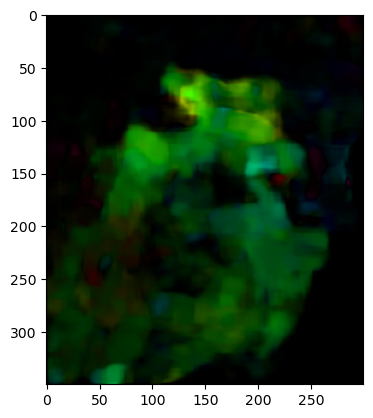

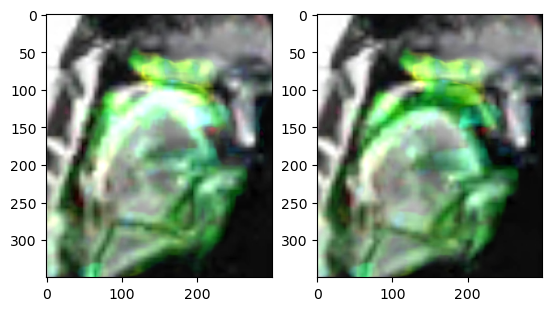

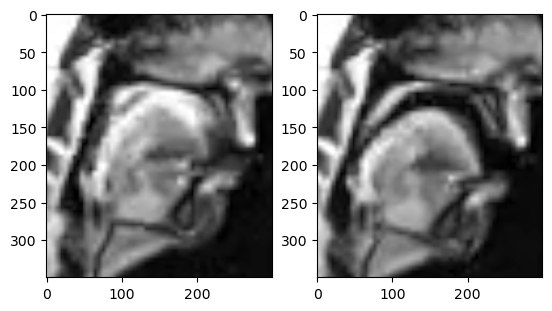

In [38]:
frame_start = 63
frame0 = np.copy(video[frame_start,...,:])
frame_end = 64   

mask = np.zeros_like(frame0)
# print(mask.shape)
# Sets image saturation to maximum
mask[..., 1] = 255

frame = np.copy(video[frame_end,...])

prev_gray = cv2.cvtColor(frame0, cv2.COLOR_BGR2GRAY)
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
flow = cv2.calcOpticalFlowFarneback(prev_gray, gray, None, 0.5, 3, 10, 6, 5, 1.2, 0)

# Computes the magnitude and angle of the 2D vectors
magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])
# Sets image hue according to the optical flow direction
# print(angle.shape)
# print(mask[..., 0])
mask[..., 0] = angle * 180 / np.pi / 2
# Sets image value according to the optical flow magnitude (normalized)
mask[..., 2] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
# print(mask)

# Converts HSV to RGB (BGR) color representation
rgb = cv2.cvtColor(mask, cv2.COLOR_HSV2BGR)
# Opens a new window and displays the output frame
# cv2.imshow("dense optical flow", rgb)

frame1 = np.copy(video[frame_start,...])
img1 = cv2.add(frame1,rgb)

frame2 = np.copy(video[frame_end,...])
img2 = cv2.add(frame2,rgb)
plt.imshow(rgb), plt.show()
plt.subplot(1,2,1)
# plt.imshow(rgb), plt.show()
plt.imshow(img1, cmap= 'gray')
plt.subplot(1,2,2)
# plt.imshow(rgb)
plt.imshow(img2, cmap= 'gray')
plt.show()

plt.subplot(1,2,1)
plt.imshow(video[frame_start,...,:], cmap='gray')
plt.subplot(1,2,2)
plt.imshow(video[frame_end,..., :], cmap='gray')
plt.show()


In [ ]:
frame.shape

(350, 300, 3)

In [46]:
angle

array([[0.       , 4.712389 , 4.712389 , ..., 1.2527419, 1.5909369,
        1.9930419],
       [3.1415927, 4.712389 , 4.712389 , ..., 1.3657023, 1.6711733,
        2.0750349],
       [3.1415927, 4.712389 , 4.712389 , ..., 1.3545516, 1.7704129,
        2.3621185],
       ...,
       [1.3184084, 1.2465342, 1.3000507, ..., 1.5154306, 1.5127156,
        1.5074506],
       [1.3085446, 1.2284114, 1.2406447, ..., 1.51801  , 1.5187296,
        1.5084742],
       [1.2957655, 1.2083752, 1.1796381, ..., 1.5324044, 1.5531349,
        1.5269115]], dtype=float32)

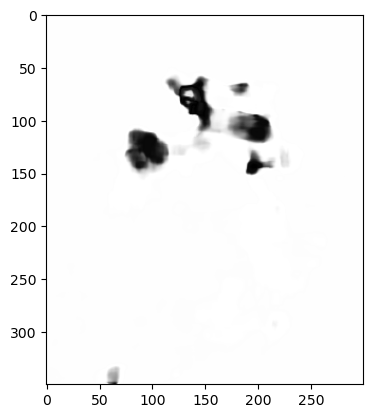

[[254 254 254 ... 254 254 254]
 [254 254 254 ... 254 254 254]
 [254 254 254 ... 254 254 254]
 ...
 [254 254 254 ... 254 254 254]
 [254 254 254 ... 254 254 254]
 [254 254 254 ... 254 254 254]]


In [115]:

mapped_img = cv2.remap(prev_gray, magnitude, magnitude, cv2.INTER_LINEAR)
plt.imshow(mapped_img, cmap = "gray")
plt.show()
print(mapped_img)

In [107]:
mask1 = np.zeros_like(frame1)
map1, map2 = cv2.convertMaps(magnitude, angle, dstmap1type = "CV_16SC2")
mapped_img = cv2.remap(frame1, map1, map2, cv2.INTER_LINEAR)
plt.imshow(mapped_img)
plt.show()

error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'convertMaps'
> Overload resolution failed:
>  - convertMaps() missing required argument 'dstmap1type' (pos 3)
>  - convertMaps() missing required argument 'dstmap1type' (pos 3)


In [105]:
# print(mask.shape)
# mask1 = mask[..., 0] + mask[..., 2]
# print(mask1.shape)

warp_mat = cv2.getAffineTransform(prev_gray, gray)
rows, cols = prev_gray.shape
dst = cv2.warpAffine(prev_gray, warp_mat, (cols,rows))
# print(mask[..., 2])

error: OpenCV(4.6.0) C:\b\abs_d8ltn27ay8\croot\opencv-suite_1676452046667\work\modules\imgproc\src\imgwarp.cpp:3399: error: (-215:Assertion failed) src.checkVector(2, CV_32F) == 3 && dst.checkVector(2, CV_32F) == 3 in function 'cv::getAffineTransform'


In [78]:
a = np.expand_dims(mask[...,0], axis=2)
b = np.expand_dims(mask[...,2], axis=2)
c = np.concatenate([a, b], axis=2)
c.shape

(350, 300, 2)

In [99]:
np.random.seed(0)
img_test = np.uint8(np.random.randn(4, 4)*255)

map_y = np.array([[0, 1], [2, 3]], dtype=np.float32)
map_x = np.array([[5, 6], [7, 10]], dtype=np.float32)
mapped_img = cv2.remap(img_test , map_x, map_y, cv2.INTER_LINEAR)

In [100]:
img_test

array([[193, 102, 249,  59],
       [220,   7, 242, 218],
       [230, 104,  36, 114],
       [194,  31, 113,  85]], dtype=uint8)